In [28]:
from pathlib import Path
import pandas as pd
import geopandas as gpd

import pyarrow.compute as pc
from networkx.algorithms.bipartite.basic import color

from src.datalake import Datalake

import matplotlib.pyplot as plt

In [29]:
data = Datalake()

In [30]:
states = data.get_us_states()

In [31]:
query = pc.field('year') == 2022

In [32]:
# weather = data.query_ghcnd(query)

In [33]:
# Filter the data for California
# california = states[states['NAME'] == 'California']
# california_geom = california.geometry.iloc[0]

In [34]:
# data_california = weather[weather.geometry.within(california_geom)]

In [35]:

# Plot California
# ax = california.plot(color='lightgrey', edgecolor='black')

# Plot the tmax values on the map of California
# data_california.plot(ax=ax, column='tmax', cmap='coolwarm', legend=True)

# Show the plot
# plt.show()

In [36]:
# fire_point = data.query_fire_point()
# fire_point

In [37]:
not_conus = ['District of Columbia','American Samoa','United States Virgin Islands', 'Commonwealth of the Northern Mariana Islands','Puerto Rico', 'Guam', 'Hawaii', 'Alaska']
states = states[~states['NAME'].isin(not_conus)]

In [38]:
fire_perimeter = data.query_fire_perimeter()
fire_perimeter

,OBJECTID,GLOBALID,FIREOCCURID,CN,REVDATE,FIRENAME,COMPLEXNAME,FIREYEAR,UNIQFIREID,SOFIRENUM,...,UNITIDPROTECT,FEATURECAT,FIRERPTQC,DBSOURCEID,DBSOURCEDATE,ACCURACY,SHAPE,SHAPEAREA,SHAPELEN,geometry
0,21869399,{FAB4B07C-303B-4D84-963C-31FBE062881E},None,1686796,2022-06-02 00:00:00+00:00,Stump,None,2013.0,2013-NDDPF-000007,007,...,NDDPF,Final Wildfire Perimeter,No,01,2024-04-17 04:00:18+00:00,NaN,None,3.030281e-09,0.000200,"POLYGON ((-103.59336 46.94481, -103.59337 46.9..."
1,21869400,{BFD36104-26AD-4F45-BB6D-9717C4BCCB3F},None,None,2022-06-02 00:00:00+00:00,Sunset,None,2020.0,2020-MT-LG01-006773,76,...,0102,Final Wildfire Perimeter,,01,2024-04-17 04:01:24+00:00,NaN,None,6.250158e-06,0.018751,"POLYGON ((-112.13894 44.8271, -112.13898 44.82..."
2,21869401,{2B128540-B4B8-4B44-8287-C12F16AE07A4},None,256772,2022-06-02 00:00:00+00:00,TurnerCkSylvanite,None,1991.0,1991-MTKNF-000124,None,...,None,Final Wildfire Perimeter,,01,2024-04-17 04:01:24+00:00,NaN,None,3.875543e-06,0.008335,"POLYGON ((-115.55129 48.84506, -115.55103 48.8..."
3,21869402,{A183D683-4BAA-494B-9A99-700915935D1A},{5B179483-2660-4AED-AFD1-FE4C73354B89},2023-MTNWS-000429,2024-01-21 05:16:45+00:00,Madera,None,2023.0,2023-MTNWS-000429,None,...,MTNWS,Final Wildfire Perimeter,Yes,01,2024-04-17 04:01:24+00:00,NaN,None,1.883997e-08,0.000634,"POLYGON ((-114.10008 48.22413, -114.10005 48.2..."
4,21869403,{DDCB6D94-065D-4267-9330-DF4A3F7743A9},None,287807,2022-06-02 00:00:00+00:00,NorthForkBigCreek,None,1994.0,1994-MTKNF-000331,None,...,None,Final Wildfire Perimeter,,01,2024-04-17 04:01:24+00:00,NaN,None,4.104097e-03,0.477270,"POLYGON ((-115.47979 48.77507, -115.47886 48.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14495,21923086,{AE395820-C255-4372-B24D-E9F58D5679A4},{D62AABCB-6A13-455E-AB62-A9595335E782},None,2021-04-22 01:09:01+00:00,Tobique,None,2021.0,2021-MNCPF-000122,122,...,MNCPF,Final Wildfire Perimeter,No,09,2024-04-17 04:08:04+00:00,999.0,None,1.380629e-07,0.001636,"POLYGON ((-94.10567 47.08152, -94.10558 47.081..."
14496,21923087,{F4BE9BEA-E816-442C-81AB-DEA2F012B765},None,,2018-03-26 00:00:00+00:00,Love,None,1999.0,,,...,None,Final Wildfire Perimeter,No,09,2024-04-17 04:08:04+00:00,999.0,None,8.297454e-07,0.003457,"POLYGON ((-79.96107 38.10931, -79.96107 38.109..."
14497,21923088,{935B1A63-7843-4FBD-BCF6-27E3EE821246},None,09052112303,2019-07-08 00:00:00+00:00,Mushroom,None,2003.0,None,None,...,MOMTF,Final Wildfire Perimeter,No,09,2024-04-17 04:08:04+00:00,999.0,None,1.857431e-06,0.007119,"POLYGON ((-92.9509 36.87507, -92.9508 36.87508..."
14498,21923089,{BAB463FA-623E-498D-ACA3-722D1DCF938C},None,09052503312,2019-07-08 00:00:01+00:00,Cllifty Creek,None,2012.0,2012-MOMTF-120033,033,...,MOMTF,Final Wildfire Perimeter,No,09,2024-04-17 04:08:04+00:00,999.0,None,1.597737e-04,0.059336,"POLYGON ((-92.27197 36.95, -92.27193 36.94997,..."


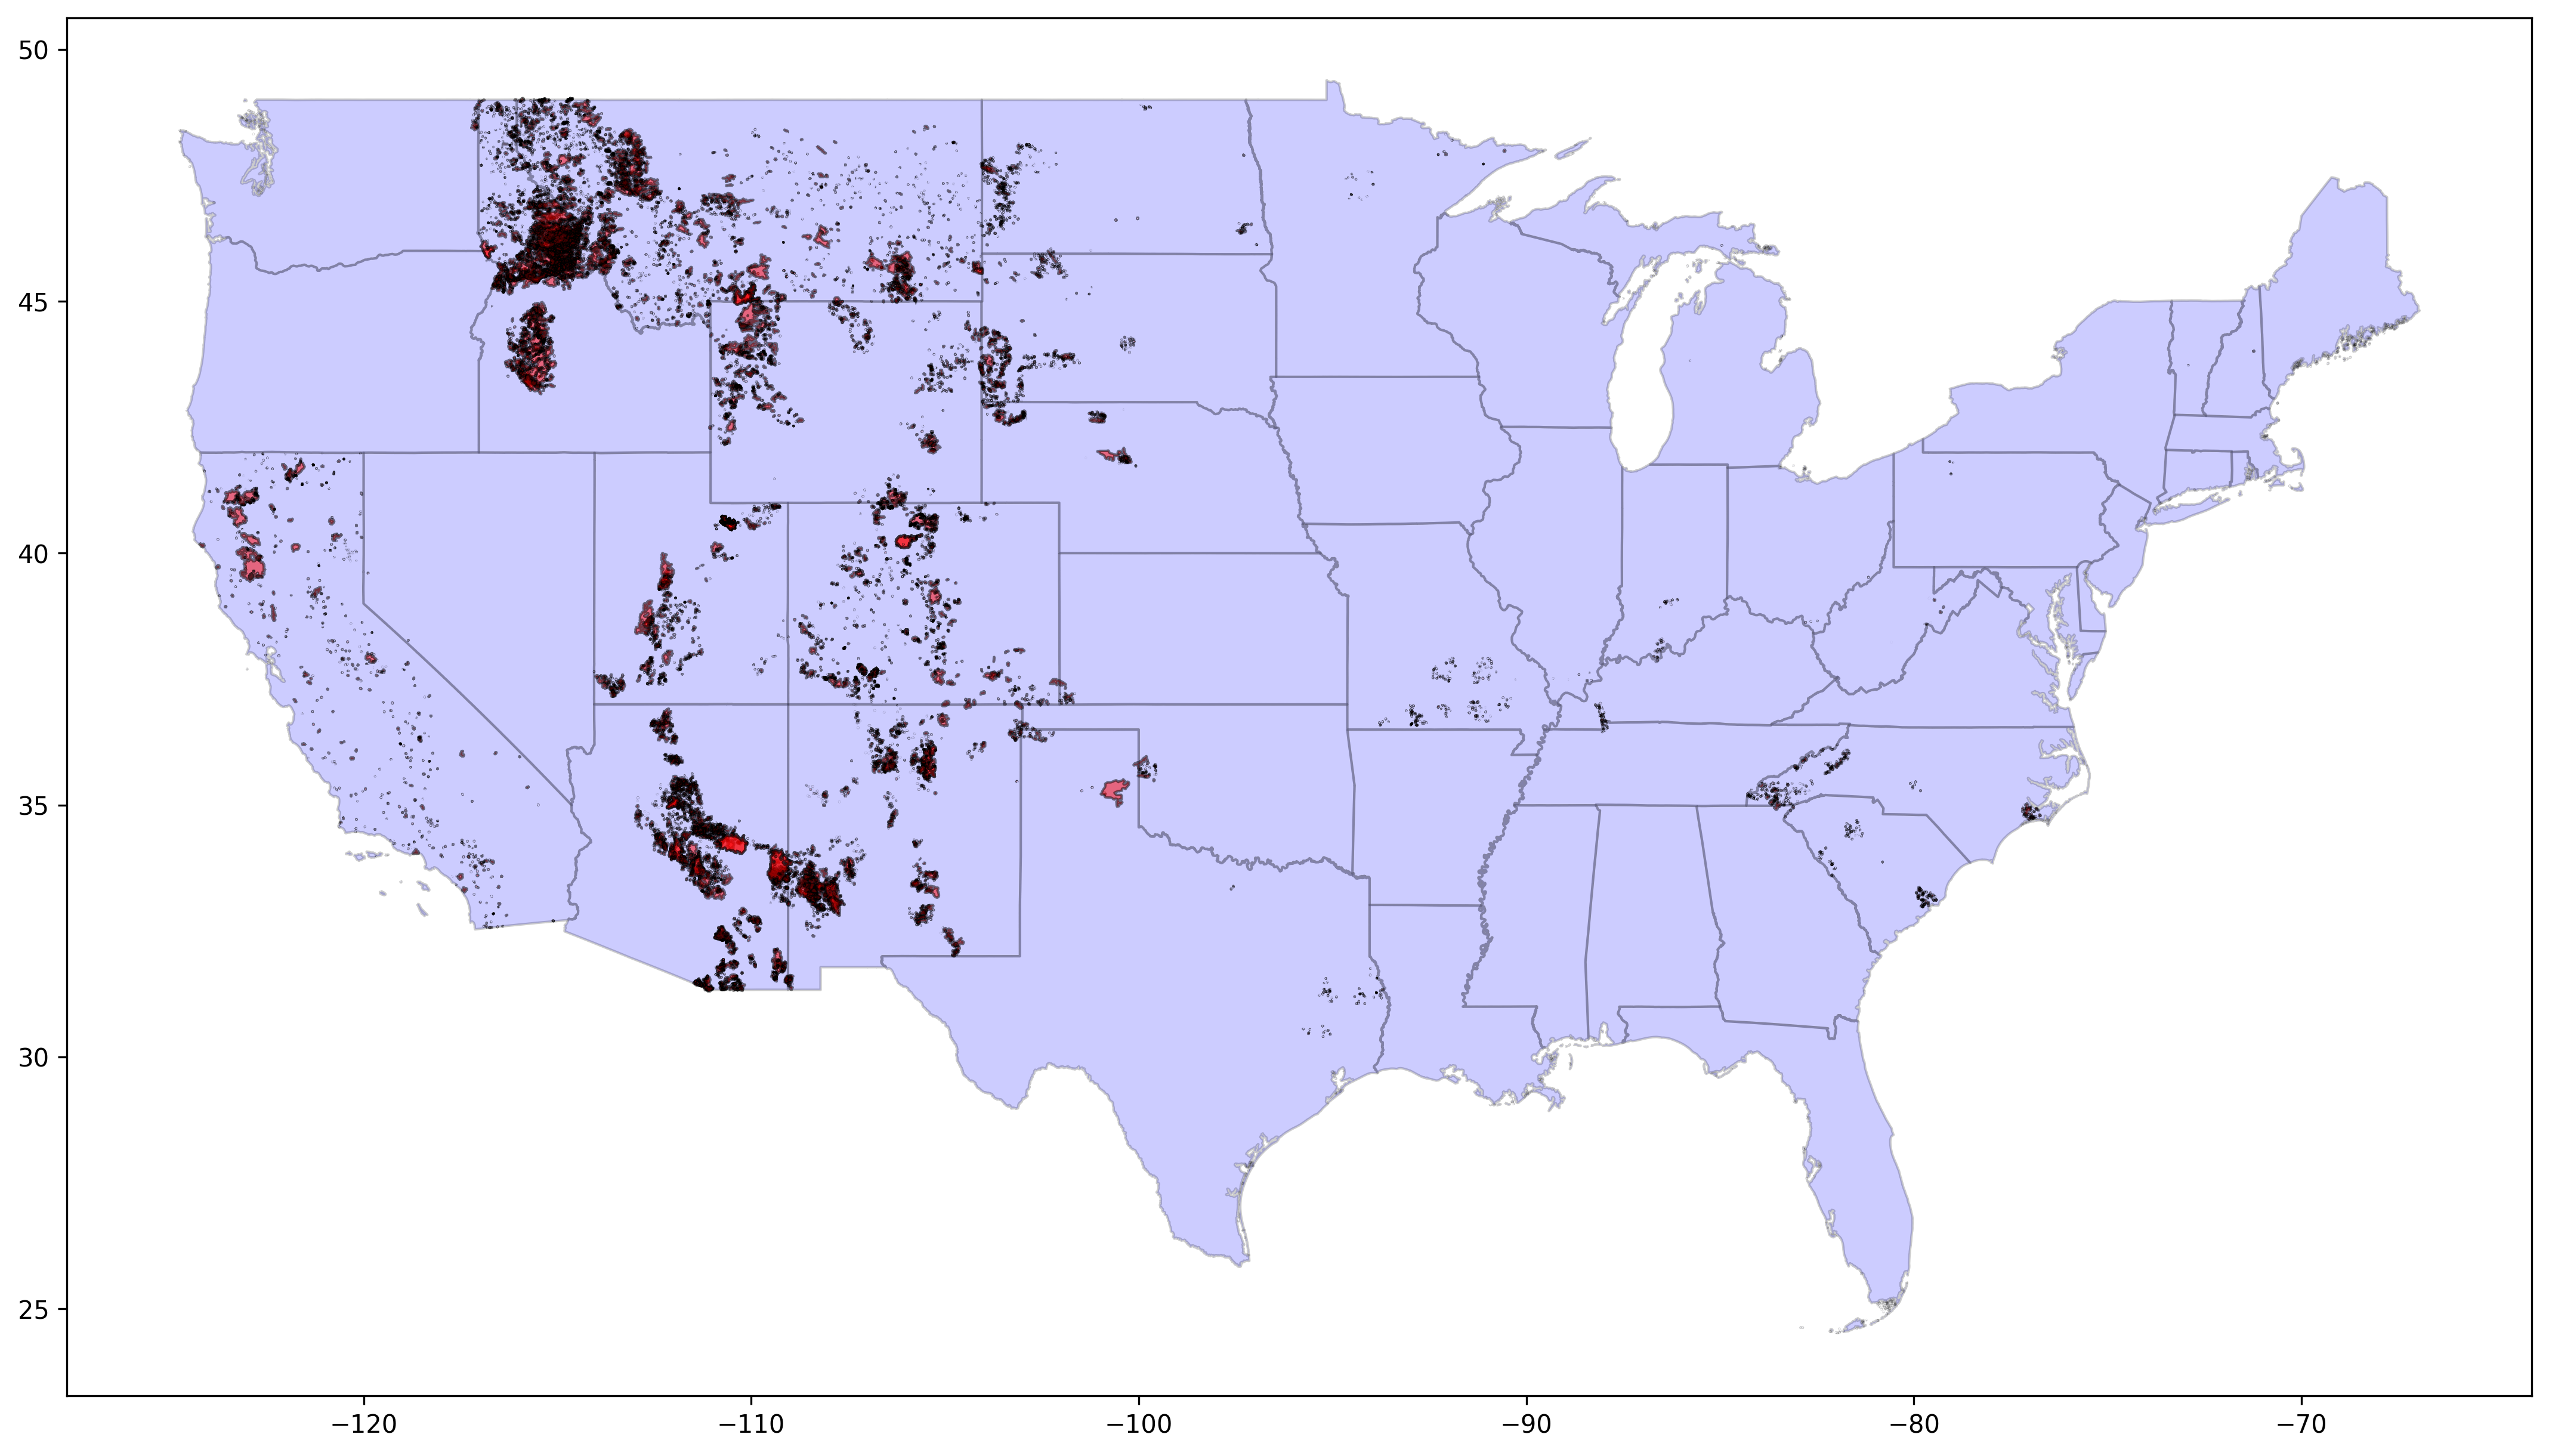

In [41]:
fig, ax = plt.subplots(figsize=(20,10), dpi = 300)
states.plot(ax=ax, color='blue', edgecolor='k', alpha=0.2)
fire_perimeter.plot(ax=ax, color='red', edgecolor='k', alpha=0.5)
plt.show()

In [40]:
states

,STATEFP,STATENS,GEOIDFQ,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,35,00897535,0400000US35,35,NM,New Mexico,00,3.141986e+11,7.264639e+08,"MULTIPOLYGON (((-109.05017 31.48, -109.04984 3..."
1,46,01785534,0400000US46,46,SD,South Dakota,00,1.963415e+11,3.387709e+09,"MULTIPOLYGON (((-104.05788 44.99761, -104.0507..."
2,06,01779778,0400000US06,06,CA,California,00,4.036733e+11,2.029177e+10,"MULTIPOLYGON (((-118.60441 33.47855, -118.5987..."
3,21,01779786,0400000US21,21,KY,Kentucky,00,1.022666e+11,2.384224e+09,"MULTIPOLYGON (((-89.40565 36.52817, -89.39868 ..."
4,01,01779775,0400000US01,01,AL,Alabama,00,1.311850e+11,4.582326e+09,"MULTIPOLYGON (((-88.05337 30.50699, -88.05109 ..."
5,13,01705317,0400000US13,13,GA,Georgia,00,1.494853e+11,4.419673e+09,"MULTIPOLYGON (((-81.27939 31.30792, -81.27716 ..."
6,05,00068085,0400000US05,05,AR,Arkansas,00,1.346605e+11,3.122251e+09,"MULTIPOLYGON (((-94.61792 36.49941, -94.61765 ..."
7,42,01779798,0400000US42,42,PA,Pennsylvania,00,1.158818e+11,3.397855e+09,"MULTIPOLYGON (((-80.51989 40.90666, -80.51963 ..."
8,29,01779791,0400000US29,29,MO,Missouri,00,1.780523e+11,2.487519e+09,"MULTIPOLYGON (((-95.77355 40.57821, -95.76853 ..."
9,08,01779779,0400000US08,08,CO,Colorado,00,2.684188e+11,1.185758e+09,"MULTIPOLYGON (((-109.06025 38.59933, -109.0595..."
